In [14]:
%pylab inline
plt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


In [16]:
import random

In [75]:
import seaborn as sns

In [55]:
N_doors = 3
change = True

doors = np.zeros(N_doors)
prize = random.choice(range(N_doors))
doors[prize] = 1
chosen_door = random.choice(range(N_doors))
print("The prize is in the door %d    User chooses door %d" % (prize, chosen_door))
restricted = set([prize, chosen_door])
eligible_doors = set(range(N_doors)) - restricted
door_to_show = random.choice(list(eligible_doors))
print("The presenter shows door %d" % door_to_show)

if change:
    eligible_doors = set(range(N_doors)) - set([chosen_door, door_to_show])
    chosen_door = random.choice(list(eligible_doors))
    print("The user changes to door %d" % chosen_door)
    
if doors[chosen_door] == 1:
    print("Win!")
else:
    print("Loss")

The prize is in the door 2    User chooses door 2
The presenter shows door 0
The user changes to door 1
Loss


In [56]:
def simgame(N_doors, change):
    doors = np.zeros(N_doors)
    prize = random.choice(range(N_doors))
    doors[prize] = 1
    chosen_door = random.choice(range(N_doors))

    restricted = set([prize, chosen_door])
    eligible_doors = set(range(N_doors)) - restricted
    door_to_show = random.choice(list(eligible_doors))

    if change:
        eligible_doors = set(range(N_doors)) - set([chosen_door, door_to_show])
        chosen_door = random.choice(list(eligible_doors))

    # Whenever you return True or False like below, simplify like in the last line
    # if doors[chosen_door] == 1:
    #    return True
    # else:
    #     return False
    
    return doors[chosen_door] == 1

In [78]:
N = 10000

change = False
results_nochange = []  # 0 if I lose, 1 if I win
for k in range(N):
    if simgame(N_doors, change):
        results_nochange.append(1)
    else:
        results_nochange.append(0)    
        
change = True
results_change = []  # 0 if I lose, 1 if I win
for k in range(N):
    if simgame(N_doors, change):
        results_change.append(1)
    else:
        results_change.append(0)    

/Users/ihr/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ihr/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


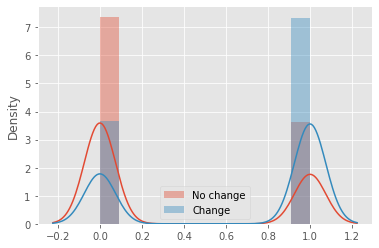

In [79]:
sns.distplot(results_nochange, label = 'No change')
sns.distplot(results_change, label = 'Change')
plt.legend()
plt.show()

In [80]:
# Let's now estimate probabilities
def experiment(N, N_doors, change):
    wins = 0
    for k in range(N):
        if simgame(N_doors, change):
            wins += 1
    
    return wins/N

In [91]:
experiment(10000, 3, False)

0.3377

In [96]:
experiment(10000, 3, True)

0.6629

In [97]:
probs_change = []
probs_nochange = []
for k in range(1000):
    
    if k%200 == 0:
        print("%d iterations..." % k)
    
    probs_nochange.append(experiment(1000, 3, False))
    probs_change.append(experiment(1000, 3, True))

0 iterations...
200 iterations...
400 iterations...
600 iterations...
800 iterations...


/Users/ihr/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ihr/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


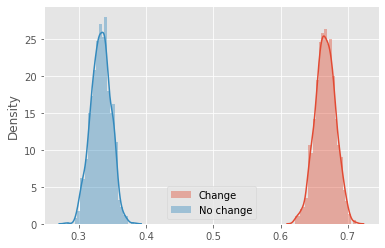

In [98]:
sns.distplot(probs_change, label = 'Change')
sns.distplot(probs_nochange, label = 'No change')
plt.legend()
plt.show()

0 iterations...
200 iterations...
400 iterations...
600 iterations...
800 iterations...


/Users/ihr/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ihr/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


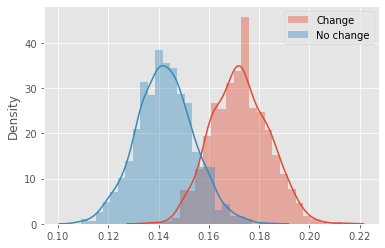

In [99]:
N_doors = 7

probs_change = []
probs_nochange = []
for k in range(1000):
    
    if k%200 == 0:
        print("%d iterations..." % k)
    
    probs_nochange.append(experiment(1000, N_doors, False))
    probs_change.append(experiment(1000, N_doors, True))
    
sns.distplot(probs_change, label = 'Change')
sns.distplot(probs_nochange, label = 'No change')
plt.legend()
plt.show()

In [104]:
experiment(50000, 7, False)

0.143

In [105]:
1/7

0.14285714285714285

In [114]:
experiment(50000, 7, True)

0.17378

In [109]:
3/14

0.21428571428571427

0 iterations...
200 iterations...
400 iterations...
600 iterations...
800 iterations...


/Users/ihr/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ihr/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


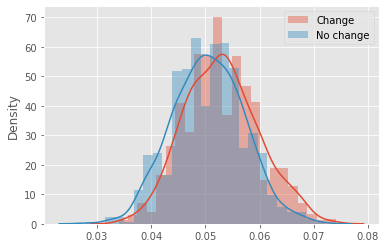

In [116]:
N_doors = 20

probs_change = []
probs_nochange = []
for k in range(1000):
    
    if k%200 == 0:
        print("%d iterations..." % k)
    
    probs_nochange.append(experiment(1000, N_doors, False))
    probs_change.append(experiment(1000, N_doors, True))
    
sns.distplot(probs_change, label = 'Change')
sns.distplot(probs_nochange, label = 'No change')
plt.legend()
plt.show()

In [ ]:
# Put more prices? (more 1s in other positions, like 5, 10, etc)
# Put prizes of diffent values, with lots of doors, and calculate your earns with the two strategies